In [12]:
import numpy as np
import pandas as pd
import datetime


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [23]:
# Set start and end date for stock prices
start_date = datetime.date(2016, 1,1)
end_date = datetime.date.today()
# Load data 
data = pd.read_excel("RELIANCE.NS(1).xlsx")
data.head()

,Date,Open,High,Low,Close,Adj Close
0,2016-01-01,504.899994,509.450012,504.100006,507.674988,484.316193
1,2016-01-04,502.500000,506.899994,493.350006,497.649994,474.752472
2,2016-01-05,500.149994,505.000000,498.500000,502.575012,479.450836
3,2016-01-06,503.799988,519.200012,500.200012,516.099976,492.353546
4,2016-01-07,510.524994,514.000000,504.024994,506.625000,483.314514


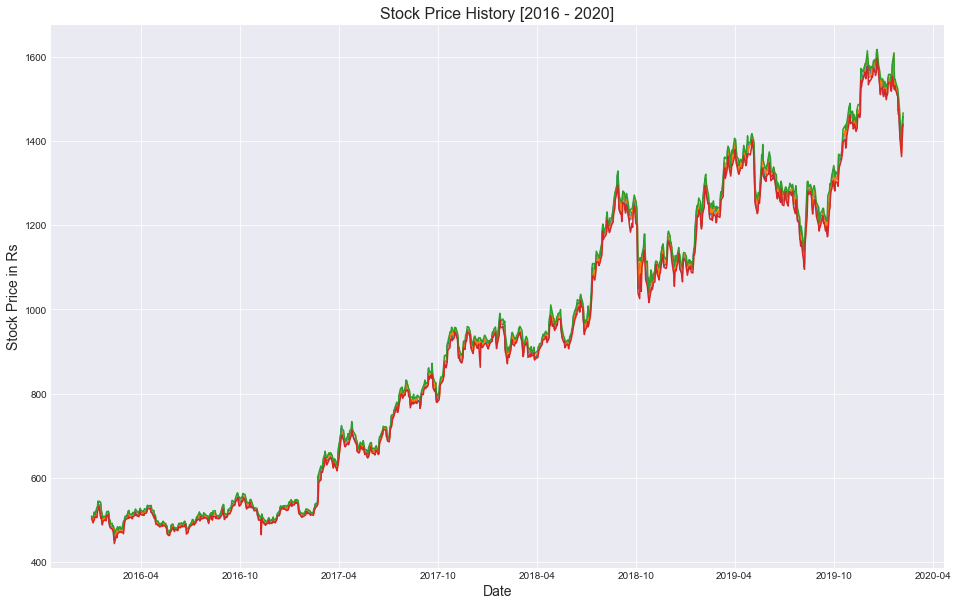

In [24]:
import matplotlib.dates as mdates

months = mdates.MonthLocator() # Get every year
monthsFmt = mdates.DateFormatter('%M') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'])
ax.plot(data['Date'], data['Open'])
ax.plot(data['Date'], data['High'])
ax.plot(data['Date'], data['Low'])

# Format the ticks
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsFmt)

# Set figure title
plt.title('Stock Price History [2016 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Stock Price in Rs', fontsize=14)

# Rotate and align the x labels
#fig.autofmt_xdate()

# Show plot
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)
# Import package for linear model
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
y_train = train['Open']
y_train = train['High']
y_train = train['Low']


In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

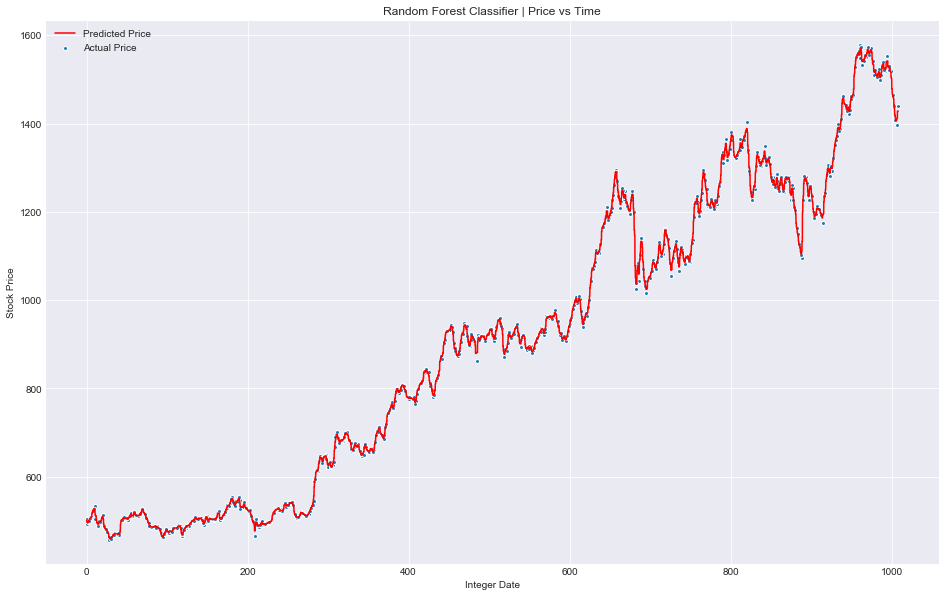

In [27]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Random Forest Classifier | Price vs Time')
X_grid=np.arange(min(X_train),max(X_train),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_grid, regressor.predict(X_grid), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_test = test['Open']
y_test = test['High']
y_test = test['Low']


In [29]:
y_pred = regressor.predict(X_test)

In [30]:
data['Prediction'] = regressor.predict(np.array(data.index).reshape(-1, 1))
data.tail()

,Date,Open,High,Low,Close,Adj Close,Prediction
1004,2020-01-31,1453.000000,1453.250000,1407.199951,1411.650024,1411.650024,1420.232324
1005,2020-02-03,1369.900024,1399.949951,1363.050049,1385.500000,1385.500000,1410.566381
1006,2020-02-04,1400.000000,1432.500000,1397.800049,1426.400024,1426.400024,1406.327067
1007,2020-02-05,1434.900024,1452.800049,1430.300049,1448.500000,1448.500000,1411.294971
1008,2020-02-06,1454.099976,1467.000000,1440.099976,1457.800049,1457.800049,1428.299542


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))


('Mean Absolute Error:', 8.912650906361183)
('Mean Squared Error:', 166.61522774175793)
('Root Mean Squared Error:', 12.907952112622588)
('R2: ', 0.9984307340498545)


In [32]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9984476585981767